In [118]:
import pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl, numpy as np
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

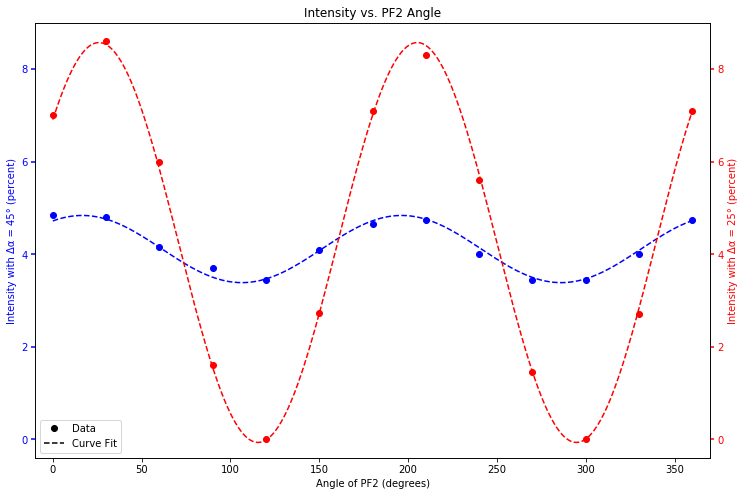

In [54]:
data = pd.read_excel("Lab6Data.xlsx", sheet_name = f"2.3")
theta = data["pf2a"]
intensity1 = data["Ia"]
intensity2 = data["Ib"]

import matplotlib.pyplot as plt

def i1(theta, a, b, omega, phi):
    return a + b*np.cos(omega * theta - phi)

initialParameters = [4.1, .7, 1.8, 0]
finalParameters, parCov = curve_fit(i1, theta*np.pi/180, intensity1, sigma = None, p0=initialParameters, absolute_sigma=False)
a1, b1, omega1, phi1 = finalParameters

initialParameters = [4.1, 4.5, 1.8, 0]
finalParameters, parCov = curve_fit(i1, theta*np.pi/180, intensity2, sigma = None, p0=initialParameters, absolute_sigma=False)
a2, b2, omega2, phi2 = finalParameters

fig, ax = plt.subplots(figsize = (15,8))
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
#twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
#twin2.spines.right.set_position(("axes", 1.2))
theta_synth = np.linspace(min(theta), max(theta), 1000)

p1, = ax.plot(theta, intensity1, "bo")
p1_theory, = ax.plot(theta_synth, [i1(angle*np.pi/180, a1, b1, omega1, phi1) for angle in theta_synth], 'b--')
p2, = twin1.plot(theta, intensity2, "ro")
p2_theory, = ax.plot(theta_synth, [i1(angle*np.pi/180, a2, b2, omega2, phi2) for angle in theta_synth], 'r--')
p3, = ax.plot([-500, -500], "o", color = "black", label = "Data")
p4, = ax.plot([-500, -500], "--", color = "black", label = "Curve Fit")
#p3, = twin2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")

ax.set_xlim(min(theta)-10, max(theta)+10)
ax.set_ylim(min(intensity2)-.4, max(intensity2)+.4)
twin1.set_ylim(min(intensity2)-.4, max(intensity2)+.4)

ax.set_xlabel("Angle of PF2 (degrees)")
ax.set_ylabel("Intensity with \u0394\u03B1 = 45\u00B0 (percent)")
twin1.set_ylabel("Intensity with \u0394\u03B1 = 25\u00B0 (percent)")
#twin2.set_ylabel("Velocity")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
#twin2.yaxis.label.set_color(p3.get_color())

#tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
#twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
#ax.tick_params(axis='x', **tkw)
ax.set_title("Intensity vs. PF2 Angle")

ax.legend(handles=[p3, p4], loc = "lower left")

plt.show()

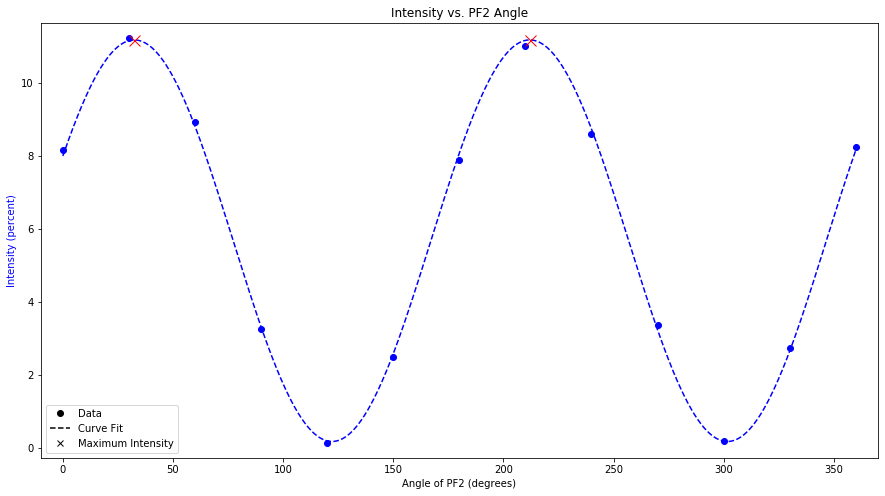

In [80]:
data = pd.read_excel("Lab6Data.xlsx", sheet_name = f"3.2")
theta = data["pf2"]
intensity1 = data["I"]
#intensity2 = data["Ib"]

import matplotlib.pyplot as plt

def i1(theta, a, b, omega, phi):
    return a + b*np.cos(omega * theta - phi)

initialParameters = [4.1, .7, 1.8, 0]
finalParameters, parCov = curve_fit(i1, theta*np.pi/180, intensity1, sigma = None, p0=initialParameters, absolute_sigma=False)
a1, b1, omega1, phi1 = finalParameters

# initialParameters = [4.1, 4.5, 1.8, 0]
# finalParameters, parCov = curve_fit(i1, theta*np.pi/180, intensity2, sigma = None, p0=initialParameters, absolute_sigma=False)
# a2, b2, omega2, phi2 = finalParameters

fig, ax = plt.subplots(figsize = (15,8))
# fig.subplots_adjust(right=0.75)

# twin1 = ax.twinx()
#twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
#twin2.spines.right.set_position(("axes", 1.2))
theta_synth = np.linspace(min(theta), max(theta), 1000)
i_synth = [i1(angle*np.pi/180, a1, b1, omega1, phi1) for angle in theta_synth]
peaks_indices = find_peaks(i_synth)

p1, = ax.plot(theta, intensity1, "bo")
p1_theory, = ax.plot(theta_synth, i_synth, 'b--')
# p2, = twin1.plot(theta, intensity2, "ro")
# p2_theory, = ax.plot(theta_synth, [i1(angle*np.pi/180, a2, b2, omega2, phi2) for angle in theta_synth], 'r--')
p_max, = ax.plot([theta_synth[j] for j in peaks_indices[0]], [i_synth[j] for j in peaks_indices[0]], "x",
                 color = "red", markersize = 11)
p3, = ax.plot([-500, -500], "o", color = "black", label = "Data")
p4, = ax.plot([-500, -500], "--", color = "black", label = "Curve Fit")
p5, = ax.plot([-500, -500], "x", color = "black", label = "Maximum Intensity")
#p3, = twin2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")

ax.set_xlim(min(theta)-10, max(theta)+10)
ax.set_ylim(min(intensity1)-.4, max(intensity1)+.4)
# twin1.set_ylim(min(intensity2)-.4, max(intensity2)+.4)

ax.set_xlabel("Angle of PF2 (degrees)")
ax.set_ylabel("Intensity (percent)")
# twin1.set_ylabel("Intensity with \u0394\u03B1 = 25\u00B0 (percent)")
#twin2.set_ylabel("Velocity")

ax.yaxis.label.set_color(p1.get_color())
# twin1.yaxis.label.set_color(p2.get_color())
#twin2.yaxis.label.set_color(p3.get_color())

#tkw = dict(size=4, width=1.5)
# ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
# twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
#twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
#ax.tick_params(axis='x', **tkw)
ax.set_title("Intensity vs. PF2 Angle")

ax.legend(handles=[p3, p4, p5], loc = "lower left")

plt.show()

In [81]:
ppp = find_peaks([i1(angle*np.pi/180, a1, b1, omega1, phi1) for angle in theta_synth])
[theta_synth[j] for j in peaks_indices[0]]

[32.43243243243243, 211.89189189189187]

m1 = [30.40540541] +- 0.7608960311702104
m2 = [26.35135135] +- 0.8623488395431975


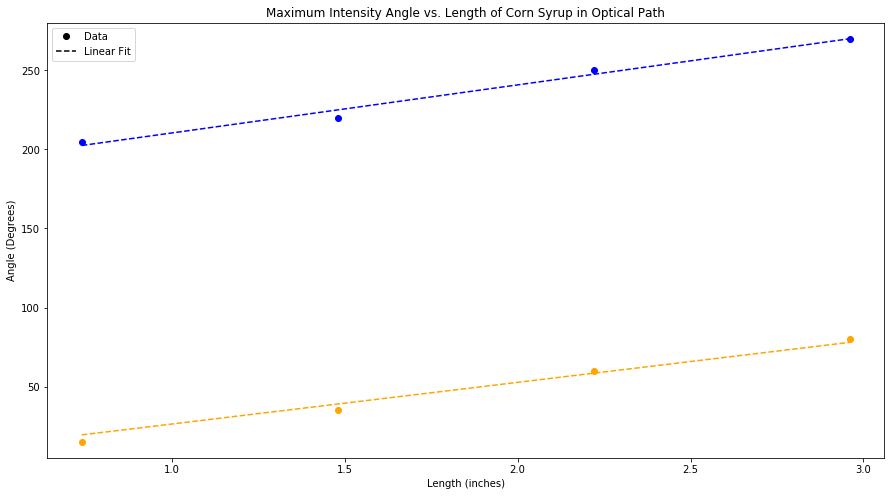

In [114]:
data = pd.read_excel("Lab6Data.xlsx", sheet_name = f"4")
theta1 = data["theta1"]
theta2 = data["theta2"]
length = data["length (inches)"]

fig, ax = plt.subplots(figsize = (15,8))

def linear1(x, m):
    return m*x + 180
def linear2(x, m):
    return m*x

initialParameters = [25]#, 180]
finalParameters, parCov = curve_fit(linear1, length, theta1, sigma = None, p0=initialParameters, absolute_sigma=False)
m1 = finalParameters
m1_sigma = parCov[0][0]

initialParameters = [25]#, 0]
finalParameters, parCov = curve_fit(linear2, length, theta2, sigma = None, p0=initialParameters, absolute_sigma=False)
m2 = finalParameters
m2_sigma = parCov[0][0]

synth_length = np.linspace(min(length), max(length), 500)

p1, = ax.plot(length, theta1, 'bo')
p1_lin, = ax.plot(synth_length, m1*synth_length + 180, 'b--')
p2, = ax.plot(length, theta2, 'o', color = "orange")
p2_lin, = ax.plot(synth_length, m2*synth_length, '--', color = "orange")
p3, = ax.plot([-500, -500], "o", color = "black", label = "Data")
p4, = ax.plot([-500, -500], "--", color = "black", label = "Linear Fit")


ax.set_xlim(min(length)-.1, max(length)+.1)
ax.set_ylim(min(theta2)-10, max(theta1)+10)

ax.set_xlabel("Length (inches)")
ax.set_ylabel("Angle (Degrees)")
ax.set_title("Maximum Intensity Angle vs. Length of Corn Syrup in Optical Path")
ax.legend()

print(f"m1 = {m1} +- {m1_sigma}")#and b1 = {b1}")
print(f"m2 = {m2} +- {m2_sigma}")#and b2 = {b2}")

In [117]:
w1 = 1 / m1_sigma**2
w2 = 1 / m2_sigma**2

m = (m1*w1 + m2*w2) / (w1+w2)
w = 1/(w1+w2)**.5
m

array([28.63077086])

In [102]:
m2_sigma/2**.5

0.6097727121893449

1.7272267775822532

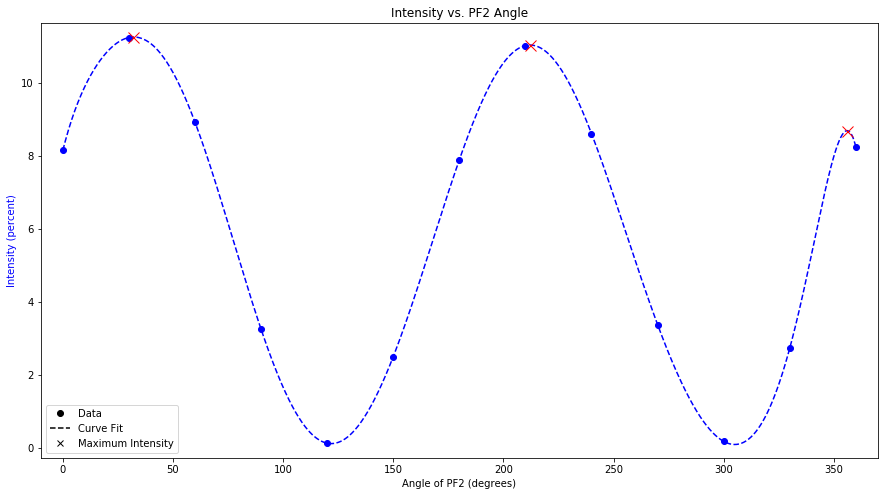

In [125]:
data = pd.read_excel("Lab6Data.xlsx", sheet_name = f"3.2")
theta = data["pf2"]
intensity1 = data["I"]
#intensity2 = data["Ib"]

import matplotlib.pyplot as plt

def i1(theta, a, b, omega, phi):
    return a + b*np.cos(omega * theta - phi)

initialParameters = [4.1, .7, 1.8, 0]
finalParameters, parCov = curve_fit(i1, theta*np.pi/180, intensity1, sigma = None, p0=initialParameters, absolute_sigma=False)
a1, b1, omega1, phi1 = finalParameters

# initialParameters = [4.1, 4.5, 1.8, 0]
# finalParameters, parCov = curve_fit(i1, theta*np.pi/180, intensity2, sigma = None, p0=initialParameters, absolute_sigma=False)
# a2, b2, omega2, phi2 = finalParameters

fig, ax = plt.subplots(figsize = (15,8))
# fig.subplots_adjust(right=0.75)

# twin1 = ax.twinx()
#twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
#twin2.spines.right.set_position(("axes", 1.2))
f = interp1d(theta, intensity1, kind = 9)

theta_synth = np.linspace(min(theta), max(theta), 1000)
i_synth = f(theta_synth)
peaks_indices = find_peaks(i_synth)

p1, = ax.plot(theta, intensity1, "bo")
p1_theory, = ax.plot(theta_synth, i_synth, 'b--')
# p2, = twin1.plot(theta, intensity2, "ro")
# p2_theory, = ax.plot(theta_synth, [i1(angle*np.pi/180, a2, b2, omega2, phi2) for angle in theta_synth], 'r--')
p_max, = ax.plot([theta_synth[j] for j in peaks_indices[0]], [i_synth[j] for j in peaks_indices[0]], "x",
                 color = "red", markersize = 11)
p3, = ax.plot([-500, -500], "o", color = "black", label = "Data")
p4, = ax.plot([-500, -500], "--", color = "black", label = "Curve Fit")
p5, = ax.plot([-500, -500], "x", color = "black", label = "Maximum Intensity")
#p3, = twin2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")

ax.set_xlim(min(theta)-10, max(theta)+10)
ax.set_ylim(min(intensity1)-.4, max(intensity1)+.4)
# twin1.set_ylim(min(intensity2)-.4, max(intensity2)+.4)

ax.set_xlabel("Angle of PF2 (degrees)")
ax.set_ylabel("Intensity (percent)")
# twin1.set_ylabel("Intensity with \u0394\u03B1 = 25\u00B0 (percent)")
#twin2.set_ylabel("Velocity")

ax.yaxis.label.set_color(p1.get_color())
# twin1.yaxis.label.set_color(p2.get_color())
#twin2.yaxis.label.set_color(p3.get_color())

#tkw = dict(size=4, width=1.5)
# ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
# twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
#twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
#ax.tick_params(axis='x', **tkw)
ax.set_title("Intensity vs. PF2 Angle")

ax.legend(handles=[p3, p4, p5], loc = "lower left")

plt.show()

In [121]:
ppp = find_peaks([i1(angle*np.pi/180, a1, b1, omega1, phi1) for angle in theta_synth])
[theta_synth[j] for j in peaks_indices[0]]

[31.35135135135135, 211.89189189189187]

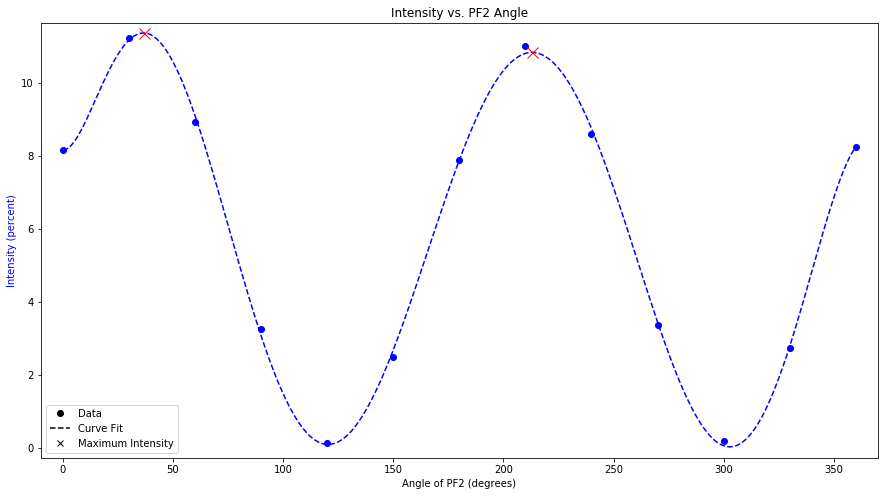

In [126]:
data = pd.read_excel("Lab6Data.xlsx", sheet_name = f"3.2")
theta = data["pf2"]
intensity1 = data["I"]
#intensity2 = data["Ib"]

import matplotlib.pyplot as plt

def i1(theta, x0, x1, x2, x3, x4, x5, x6, x7, x8):
    value = 0
    for power, number in enumerate([x0, x1, x2, x3, x4, x5, x6, x7, x8]):
        value += number * theta**power
    return value

initialParameters = [0 for i in range(9)]
finalParameters, parCov = curve_fit(i1, theta*np.pi/180, intensity1, sigma = None, p0=initialParameters, absolute_sigma=False)
x0, x1, x2, x3, x4, x5, x6, x7, x8 = finalParameters

# initialParameters = [4.1, 4.5, 1.8, 0]
# finalParameters, parCov = curve_fit(i1, theta*np.pi/180, intensity2, sigma = None, p0=initialParameters, absolute_sigma=False)
# a2, b2, omega2, phi2 = finalParameters

fig, ax = plt.subplots(figsize = (15,8))
# fig.subplots_adjust(right=0.75)

# twin1 = ax.twinx()
#twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
#twin2.spines.right.set_position(("axes", 1.2))
theta_synth = np.linspace(min(theta), max(theta), 1000)
i_synth = [i1(angle*np.pi/180, x0, x1, x2, x3, x4, x5, x6, x7, x8) for angle in theta_synth]
peaks_indices = find_peaks(i_synth)

p1, = ax.plot(theta, intensity1, "bo")
p1_theory, = ax.plot(theta_synth, i_synth, 'b--')
# p2, = twin1.plot(theta, intensity2, "ro")
# p2_theory, = ax.plot(theta_synth, [i1(angle*np.pi/180, a2, b2, omega2, phi2) for angle in theta_synth], 'r--')
p_max, = ax.plot([theta_synth[j] for j in peaks_indices[0]], [i_synth[j] for j in peaks_indices[0]], "x",
                 color = "red", markersize = 11)
p3, = ax.plot([-500, -500], "o", color = "black", label = "Data")
p4, = ax.plot([-500, -500], "--", color = "black", label = "Curve Fit")
p5, = ax.plot([-500, -500], "x", color = "black", label = "Maximum Intensity")
#p3, = twin2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")

ax.set_xlim(min(theta)-10, max(theta)+10)
ax.set_ylim(min(intensity1)-.4, max(intensity1)+.4)
# twin1.set_ylim(min(intensity2)-.4, max(intensity2)+.4)

ax.set_xlabel("Angle of PF2 (degrees)")
ax.set_ylabel("Intensity (percent)")
# twin1.set_ylabel("Intensity with \u0394\u03B1 = 25\u00B0 (percent)")
#twin2.set_ylabel("Velocity")

ax.yaxis.label.set_color(p1.get_color())
# twin1.yaxis.label.set_color(p2.get_color())
#twin2.yaxis.label.set_color(p3.get_color())

#tkw = dict(size=4, width=1.5)
# ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
# twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
#twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
#ax.tick_params(axis='x', **tkw)
ax.set_title("Intensity vs. PF2 Angle")

ax.legend(handles=[p3, p4, p5], loc = "lower left")

plt.show()